## Configuration

In [1]:
import tensorflow as tf

### Locate the images
visit the images in the path, where they are classified by the categories

In [2]:
import pathlib

data_root = pathlib.Path.home().joinpath('Documents/Github/Dissertation/Data/')
for item in data_root.iterdir():
  print(item)

/Users/cyril/Documents/Github/Dissertation/Data/Triple Tops
/Users/cyril/Documents/Github/Dissertation/Data/.DS_Store
/Users/cyril/Documents/Github/Dissertation/Data/Pipe Tops
/Users/cyril/Documents/Github/Dissertation/Data/Flags
/Users/cyril/Documents/Github/Dissertation/Data/Rectangle Tops
/Users/cyril/Documents/Github/Dissertation/Data/Gaps
/Users/cyril/Documents/Github/Dissertation/Data/Island Reversals
/Users/cyril/Documents/Github/Dissertation/Data/Horn Bottoms
/Users/cyril/Documents/Github/Dissertation/Data/Scallops
/Users/cyril/Documents/Github/Dissertation/Data/Pipe Bottoms
/Users/cyril/Documents/Github/Dissertation/Data/Horn Tops
/Users/cyril/Documents/Github/Dissertation/Data/Pennants
/Users/cyril/Documents/Github/Dissertation/Data/Triple Bottoms
/Users/cyril/Documents/Github/Dissertation/Data/Rectangle Bottoms


In [17]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths if "DS_Store" not in str(path)]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

374

In [18]:
all_image_paths[:10]

['/Users/cyril/Documents/Github/Dissertation/Data/Pennants/000025_20010912.jpg',
 '/Users/cyril/Documents/Github/Dissertation/Data/Horn Tops/000007_20100126.jpg',
 '/Users/cyril/Documents/Github/Dissertation/Data/Scallops/000153_20100125.jpg',
 '/Users/cyril/Documents/Github/Dissertation/Data/Flags/000011_20000926.jpg',
 '/Users/cyril/Documents/Github/Dissertation/Data/Horn Tops/000020_20050726.jpg',
 '/Users/cyril/Documents/Github/Dissertation/Data/Gaps/000156_20130412.jpg',
 '/Users/cyril/Documents/Github/Dissertation/Data/Pipe Bottoms/000027_20050524.jpg',
 '/Users/cyril/Documents/Github/Dissertation/Data/Horn Tops/000419_20091207.jpg',
 '/Users/cyril/Documents/Github/Dissertation/Data/Pipe Bottoms/000006_20150306.jpg',
 '/Users/cyril/Documents/Github/Dissertation/Data/Scallops/000056_20120215.jpg']

### List the labels

In [19]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['Flags',
 'Gaps',
 'Horn Bottoms',
 'Horn Tops',
 'Island Reversals',
 'Pennants',
 'Pipe Bottoms',
 'Pipe Tops',
 'Rectangle Bottoms',
 'Rectangle Tops',
 'Scallops',
 'Triple Bottoms',
 'Triple Tops']

#### set index for the label (as dictionary)

In [20]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'Flags': 0,
 'Gaps': 1,
 'Horn Bottoms': 2,
 'Horn Tops': 3,
 'Island Reversals': 4,
 'Pennants': 5,
 'Pipe Bottoms': 6,
 'Pipe Tops': 7,
 'Rectangle Bottoms': 8,
 'Rectangle Tops': 9,
 'Scallops': 10,
 'Triple Bottoms': 11,
 'Triple Tops': 12}

#### Store all labels for each image

In [21]:
all_image_labels =[]
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [5, 3, 10, 0, 3, 1, 6, 3, 6, 10]


### Load and Normalize Data

#### Take one image as an example

In [22]:
img_path = all_image_paths[0]
img_path

'/Users/cyril/Documents/Github/Dissertation/Data/Pennants/000025_20010912.jpg'

In [23]:
import cv2
img_cv = cv2.imread(img_path)
img_cv = img_cv[:, :, [2, 1, 0]]
type(img_cv)

numpy.ndarray

In [24]:
img_size = (224, 224)

#### Design a function for later use

In [25]:
def load_and_preprocess_image(image):
    image = cv2.imread(image)
    image = cv2.resize(image, img_size)
    image = image[:, :, [2, 1, 0]]
    image = image.astype('float64')
    image /= 255.0  # normalize to [0,1] range

    return image

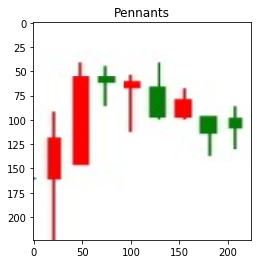

In [26]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.title(label_names[label].title())
print()

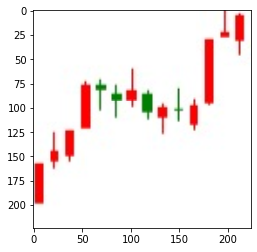

In [27]:
ia = load_and_preprocess_image(all_image_paths[10])
plt.imshow(ia)

### Load all images and process

In [28]:
from tqdm import tqdm
import numpy as np
images = []
for image_path in tqdm(all_image_paths):
    processed_image = load_and_preprocess_image(image_path)
    images.append(processed_image)


100%|██████████| 374/374 [00:00<00:00, 625.19it/s]


In [29]:
# images = np.asarray(images)
type(images)

list

In [30]:
type(all_image_labels)

list

In [32]:
all_image_labels = np.asarray(all_image_labels)
from keras.utils import to_categorical
all_image_labels = to_categorical(all_image_labels, num_classes=13)
all_image_labels.shape

(374, 13)

### Split train and test dataset

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, all_image_labels, test_size=0.2, random_state=6)
# print(x_train.shape)
# print(x_val.shape)
# print(y_train.shape)
# print(y_val.shape)

In [34]:
print(len(x_train))

299


### Training the model

#### 1) Bulid the model

In [45]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3

# base_model = VGG16(include_top=False, input_shape=(224, 224, 3))
# base_model = VGG19(include_top=False, input_shape=(224, 224, 3))
# base_model = MobileNet(include_top=False, input_shape=(224, 224, 3))
base_model = ResNet50(include_top=False, input_shape=(224, 224, 3))
# base_model = InceptionV3(include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

In [46]:
FC_NUMS = 1024
# 冻结训练的层数，根据模型的不同，层数也不一样，根据调试的结果，VGG19和VGG16c层比较符合理想的测试结果，本文采用VGG19做示例
FREEZE_LAYERS = 160
# 进行训练和测试的图片大小，VGG19推荐为224×244
IMAGE_SIZE = 224
NUM_CLASSES = 3

In [47]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(FC_NUMS, activation='relu')(x)
prediction = Dense(NUM_CLASSES, activation='softmax')(x)

In [48]:
from tensorflow.keras.models import Model

# 构造完新的FC层，加入custom层
model = Model(inputs=base_model.input, outputs=prediction)
# 可观察模型结构
model.summary()
# 获取模型的层数
print("layer nums:", len(model.layers))

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [49]:


# 除了FC层，靠近FC层的一部分卷积层可参与参数训练，
# 一般来说，模型结构已经标明一个卷积块包含的层数，
# 在这里我们选择FREEZE_LAYERS为17，表示最后一个卷积块和FC层要参与参数训练



for layer in model.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in model.layers[FREEZE_LAYERS:]:
    layer.trainable = True
for layer in model.layers:
    print("layer.trainable:", layer.trainable)

layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.trainable: False
layer.train

In [50]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
# # 给出训练图片的生成器， 其中classes定义后，可让model按照这个顺序进行识别
# train_datagen = ImageDataGenerator()
# train_generator = train_datagen.flow_from_directory(directory=TRAIN_PATH,
#                                                     target_size=(IMAGE_SIZE, IMAGE_SIZE), classes=label_names)
# test_datagen = ImageDataGenerator()
# test_generator = test_datagen.flow_from_directory(directory=TEST_PATH,
#                                                   target_size=(IMAGE_SIZE, IMAGE_SIZE), classes=label_names)

In [52]:
batch_size = 4
epochs = 20
learing_rate = 1e-3

In [53]:
def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * tf.math.exp(0.1 * (10 - epoch))

In [54]:
callbacks = [
# 当验证集上的损失“val_loss”连续两个训练回合（epoch）都没有变化，则提前结束训练
tf.keras.callbacks.EarlyStopping(patience=4, monitor='val_loss'),
# 使用TensorBoard保存训练的记录，保存到“./logs”目录中
tf.keras.callbacks.TensorBoard(log_dir='./logs'),
tf.keras.callbacks.LearningRateScheduler(scheduler)]

In [55]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=15,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)
datagen.fit(x_train)

In [58]:
history = model.fit(x_train, y_train, batch_size=batch_size,
                    epochs=epochs, verbose=1,
                    validation_data = (x_val, y_val),
                   callbacks=callbacks)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'numpy.ndarray'>"}), (<class 'list'> containing values of types {"<class 'int'>"})

In [57]:
# history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
#                               steps_per_epoch=len(x_train) // batch_size,
#                               epochs = epochs, verbose=1,
#                               validation_data = (x_val, y_val),
#                                callbacks=callbacks)

ValueError: `x` (images tensor) and `y` (labels) should have the same length. Found: x.shape = (224, 224, 3), y.shape = (12000,)

In [159]:
result = model.evaluate(x_val, y_val)
print("loss: {}".format(result[0]))
print("accuracy: {}".format(result[1]))

3000/3000 [==============================] - 97s 32ms/sample - loss: 1.1352 - accuracy: 0.3263
loss: 1.1352094589869182
accuracy: 0.32633334398269653
